In [1]:
# numpy 1.26.4
import numpy as np
# pandas 2.2.2
import pandas as pd
# scikit-learn 1.5.1
from sklearn.decomposition import PCA
# matplotlib 3.8.4
import matplotlib.pyplot as plt
# adjustText 0.7.3
from adjustText import adjust_text

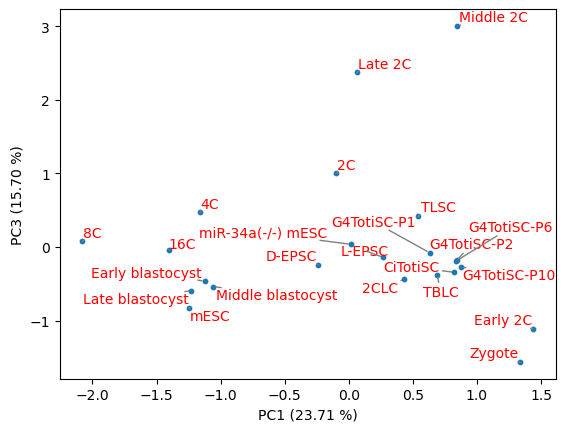

In [2]:
# parameter set
infile = '/disk-e/TXC/TotiES/RNA/0612-PCA.txt'
#outfile = '/disk-e/TXC/TotiES/RNA/TotiESFinal-0607_rpkm_PCA5.svg'
pc1, pc2 = 1,3

# readin data
data = pd.read_csv(infile, sep='\t', header=0, index_col=0)
idx1, idx2 = pc1 - 1, pc2 - 1

# zscore and PCA
data = data.T
data = np.log2(data + 1)
data = (data - data.mean()) / data.std()
pca = PCA(n_components=6, whiten=True)
result = pca.fit_transform(data.fillna(0))

# plot figure
fig, ax = plt.subplots()
ax.set_xlabel('PC%d (%.2f %%)' % (pc1, pca.explained_variance_ratio_[idx1] * 100), fontdict={'size': 10, 'color': 'black'})
ax.set_ylabel('PC%d (%.2f %%)' % (pc2, pca.explained_variance_ratio_[idx2] * 100), fontdict={'size': 10, 'color': 'black'})

ax.scatter(result[:, idx1], result[:, idx2], s=10)
group = data.index
texts = [ax.text(value[idx1], value[idx2], group[index], fontsize=10, color='r') for index, value in enumerate(result)]
_ = adjust_text(texts, ax=ax, only_move={'text':'xy'}, arrowprops=dict(arrowstyle='-', lw=1, color='grey'))
# plt.savefig(outfile, dpi=1200, bbox_inches='tight', pad_inches=0)